In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import requests
import json
import alpha_vantage
from config import apiKey
import keras

Using TensorFlow backend.


In [2]:
yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')

In [3]:
past_year = datetime.strftime(datetime.now() - timedelta(366), '%Y-%m-%d')

In [4]:
user_ticker = input("What ticker symbol would you like to evaluate?")

What ticker symbol would you like to evaluate?GOOG


In [5]:
user_ticker

'GOOG'

In [6]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo
from alpha_vantage.timeseries import TimeSeries
url = "https://www.alphavantage.co/query?"
query_url = f"{url}function=TIME_SERIES_DAILY&symbol={user_ticker}&outputsize=full&apikey={apiKey}" 

In [116]:
response = requests.get(query_url).json() 
response

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOOG',
  '3. Last Refreshed': '2019-03-27',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2019-03-27': {'1. open': '1185.5000',
   '2. high': '1187.5600',
   '3. low': '1159.3700',
   '4. close': '1173.0200',
   '5. volume': '1362213'},
  '2019-03-26': {'1. open': '1198.5300',
   '2. high': '1202.8300',
   '3. low': '1176.7200',
   '4. close': '1184.6200',
   '5. volume': '1901156'},
  '2019-03-25': {'1. open': '1196.9300',
   '2. high': '1206.4000',
   '3. low': '1187.0400',
   '4. close': '1193.0000',
   '5. volume': '1496843'},
  '2019-03-22': {'1. open': '1226.3200',
   '2. high': '1230.0000',
   '3. low': '1202.8300',
   '4. close': '1205.5000',
   '5. volume': '1714247'},
  '2019-03-21': {'1. open': '1216.0000',
   '2. high': '1231.7900',
   '3. low': '1213.1500',
   '4. close': '1231.5400',
   '5. volume': '1204045'},
  '2019-03-20':

In [72]:
df = pd.DataFrame(response["Time Series (Daily)"]) 

In [73]:
df_transposed = df.T # or df1.transpose()


In [74]:
df_filtered = df_transposed[yesterday : past_year]

In [75]:
df_filtered.rename(columns={'2. high':'high', '3. low':'low', '4. close':'close', '5. volume':'volume'}, inplace=True)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [76]:
df_filtered.drop('1. open', axis=1, inplace=True)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
df_filtered = df_filtered[['close', 'low', 'high', 'volume']] 

In [96]:
df_filtered.astype(dtype='float64')
df_filtered.index = pd.to_datetime(df_filtered.index, format='%Y%m%d', errors='ignore')
df_filtered.head()

,close,low,high,volume
2019-03-26,1184.6200,1176.7200,1202.8300,1901156
2019-03-25,1193.0000,1187.0400,1206.4000,1496843
2019-03-22,1205.5000,1202.8300,1230.0000,1714247
2019-03-21,1231.5400,1213.1500,1231.7900,1204045
2019-03-20,1223.9700,1196.1700,1227.1400,2227786


In [97]:
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
ten_day_model = load_model("../ML/model_ten_day.h5")
thirty_day_model = load_model("../ML/model_thirty_day.h5")
sixty_day_model = load_model("../ML/model_sixty_day.h5")  

In [98]:

dataset = df_filtered.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
X_test, y_test = [], []
for i in range(61,len(dataset)):
    X_test.append(scaled_data[i-61:i-1,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
closing_price = sixty_day_model.predict(X_test)

In [100]:
closing_price

array([[ 0.20750004],
       [ 0.19759393],
       [ 0.16568296],
       [-0.00585546],
       [ 0.04966064],
       [ 0.11872082],
       [ 0.16191502],
       [ 0.17098269],
       [ 0.13727126],
       [ 0.22408855],
       [ 0.29153258],
       [ 0.29755527],
       [ 0.24084885],
       [ 0.19846012],
       [ 0.21884151],
       [ 0.30029187],
       [ 0.27489352],
       [ 0.47816294],
       [ 0.385736  ],
       [ 0.3695687 ],
       [ 0.33778492],
       [ 0.2121301 ],
       [ 0.23217192],
       [ 0.1540043 ],
       [ 0.21371526],
       [ 0.15315302],
       [ 0.15900645],
       [ 0.28783855],
       [ 0.2737576 ],
       [ 0.20280078],
       [ 0.19395271],
       [ 0.21612355],
       [ 0.3086862 ],
       [ 0.36218014],
       [ 0.37834686],
       [ 0.23763543],
       [ 0.20365338],
       [ 0.29369766],
       [ 0.3292789 ],
       [ 0.33956593],
       [ 0.17082721],
       [ 0.17641692],
       [ 0.3346395 ],
       [ 0.40412343],
       [ 0.26772374],
       [ 0

In [101]:
final = []
for price in closing_price:
    final.append(np.pad(price, (0, 3), 'constant'))
final_price = scaler.inverse_transform(final)
close = []
for price in final_price:
    close.append(price[0])

In [102]:
close

[1036.8328368395566,
 1033.9391621279717,
 1024.6176484455168,
 974.5095627494157,
 990.7263689588011,
 1010.8995393250138,
 1023.5169962452352,
 1026.1657531860471,
 1016.3183063724638,
 1041.6785062277318,
 1061.3795807999372,
 1063.138869280219,
 1046.5743587957322,
 1034.1921847717465,
 1040.1457929109038,
 1063.938256995976,
 1056.5191467881202,
 1115.8961776643991,
 1088.8973396348954,
 1084.1747145807744,
 1074.8903518602253,
 1038.1853233751656,
 1044.0397404047847,
 1021.2061977091432,
 1038.6483632141353,
 1020.9575278435648,
 1022.6673731163145,
 1060.3005183795094,
 1056.1873345062138,
 1035.4601360020042,
 1032.8755259534717,
 1039.3518505206705,
 1066.3903249484301,
 1082.01644174546,
 1086.7389013940096,
 1045.6356865304708,
 1035.7091889120638,
 1062.0120220607519,
 1072.4056554824115,
 1075.4106046158076,
 1026.1203362983465,
 1027.7531461025776,
 1073.9715413218737,
 1094.2684938180446,
 1054.4247814422847,
 1104.2778988027574,
 1101.0390836024285,
 1096.5575328159332

In [103]:
len(df_filtered)

252

In [104]:
valid = df_filtered[61:] 

In [105]:
valid

,close,low,high,volume
2018-12-26,1039.4600,983.0000,1040.0000,2373270
2018-12-24,976.2200,970.1100,1003.5400,1590328
2018-12-21,979.5400,973.6900,1024.0200,4595891
2018-12-20,1009.4100,996.3600,1034.2200,2673464
2018-12-19,1023.0100,1008.0500,1062.0000,2479338
2018-12-18,1028.7100,1021.4400,1049.4800,2192533
2018-12-17,1016.5300,1007.9000,1053.1500,2385364
2018-12-14,1042.1000,1040.7900,1062.6000,1686619
2018-12-13,1061.9000,1053.9300,1079.7600,1329768
2018-12-12,1063.6800,1062.7900,1081.6500,1523804


In [106]:
valid["Predictions"] = close 

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
valid.dtypes

close           object
low             object
high            object
volume          object
Predictions    float64
dtype: object

TypeError: unhashable type: 'numpy.ndarray'

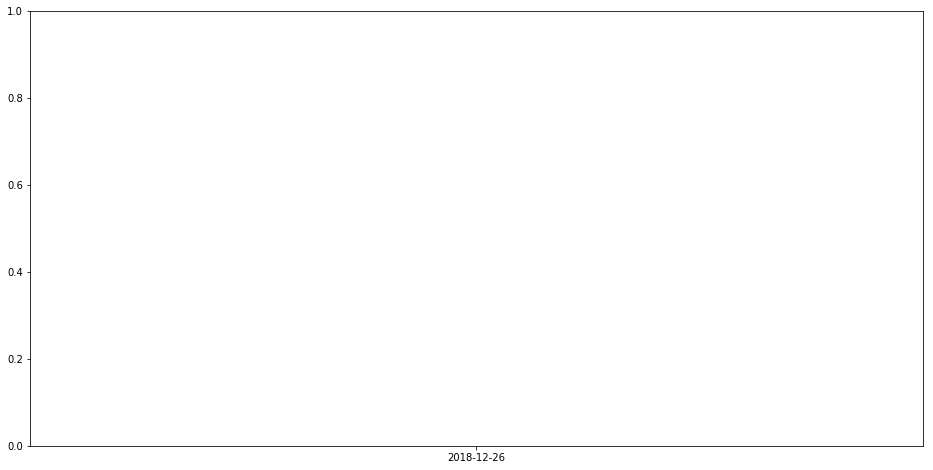

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))


#plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])

TypeError: unhashable type: 'numpy.ndarray'

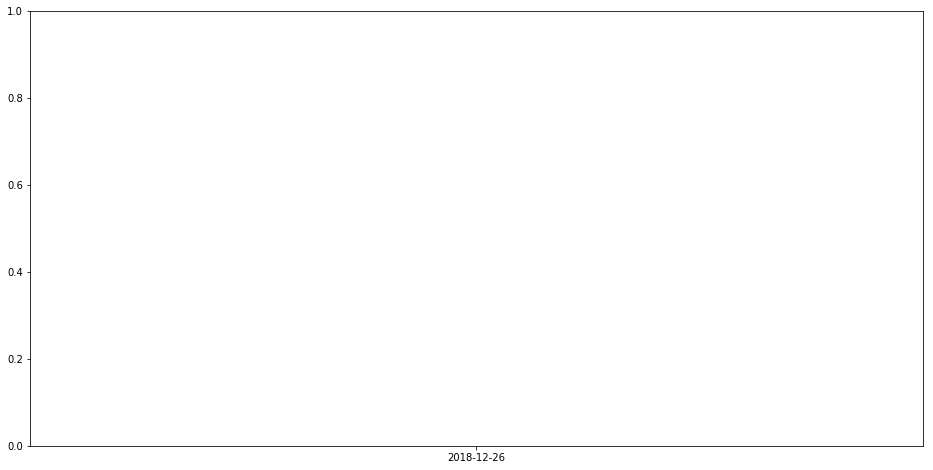

In [46]:
plt.figure(figsize=(16,8))
plt.plot(valid)
